In [11]:
import pandas as pd

# Load the files
stance_classification_path = 'stance_classification.csv'
sentiment_path = 'sentiment.csv'

# Read the CSV files into DataFrames
stance_df = pd.read_csv(stance_classification_path)
sentiment_df = pd.read_csv(sentiment_path)

# Display the first few rows of each DataFrame to understand their structure
stance_df_head = stance_df.head()
sentiment_df_head = sentiment_df.head()

stance_df_head, sentiment_df_head

(                          labels  \
 0  ['anti-Israel', 'pro-Israel']   
 1  ['anti-Israel', 'pro-Israel']   
 2  ['anti-Israel', 'pro-Israel']   
 3  ['pro-Israel', 'anti-Israel']   
 4  ['anti-Israel', 'pro-Israel']   
 
                                             sequence  \
 0  Hamas event in Jerusalem : Wage jihad to destr...   
 1  In Hamas - governed Gaza , Fatah rallies again...   
 2  Universities Are Seeing An Enormous Spike In A...   
 3  Palestinian Authority facing year of critical ...   
 4  Culture of hope : 2022 and the margins of vict...   
 
                                         scores  
 0  [0.9986788630485535, 0.0013211950426921248]  
 1   [0.9928072690963745, 0.007192753255367279]  
 2    [0.7671117186546326, 0.23288823664188385]  
 3     [0.5899437665939331, 0.4100562036037445]  
 4    [0.6406125426292419, 0.35938748717308044]  ,
                                     Sentiment Scores  \
 0  {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'comp...   
 1  {'neg': 0.308

In [12]:
import ast
import json

# Function to convert string representations of lists and dictionaries to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return json.loads(string)

# Apply this function to 'labels' and 'scores' in stance classification data
stance_df['labels'] = stance_df['labels'].apply(parse_string_to_literal)
stance_df['scores'] = stance_df['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df.at[index, label] = score

# Apply this function to 'Sentiment Scores' in sentiment analysis data
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_string_to_literal)

# Split 'Sentiment Scores' into separate columns
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df, sentiment_scores_expanded], axis=1).drop('Sentiment Scores', axis=1)

# Display the modified head of the dataframes to check the transformations
modified_stance_head = stance_df.head()
modified_sentiment_head = sentiment_df.head()

modified_stance_head, modified_sentiment_head

(                      labels  \
 0  [anti-Israel, pro-Israel]   
 1  [anti-Israel, pro-Israel]   
 2  [anti-Israel, pro-Israel]   
 3  [pro-Israel, anti-Israel]   
 4  [anti-Israel, pro-Israel]   
 
                                             sequence  \
 0  Hamas event in Jerusalem : Wage jihad to destr...   
 1  In Hamas - governed Gaza , Fatah rallies again...   
 2  Universities Are Seeing An Enormous Spike In A...   
 3  Palestinian Authority facing year of critical ...   
 4  Culture of hope : 2022 and the margins of vict...   
 
                                         scores  anti-Israel  pro-Israel  
 0  [0.9986788630485535, 0.0013211950426921248]     0.998679    0.001321  
 1   [0.9928072690963745, 0.007192753255367279]     0.992807    0.007193  
 2    [0.7671117186546326, 0.23288823664188385]     0.767112    0.232888  
 3     [0.5899437665939331, 0.4100562036037445]     0.410056    0.589944  
 4    [0.6406125426292419, 0.35938748717308044]     0.640613    0.359387  ,
     

1- Comparing Stance and Sentiment: Analyze how the stance classification relates to sentiment scores.

2- Distribution of Stance and Sentiment Scores: Visualize the distribution of stance scores and sentiment scores.

3- Correlation Analysis: See if there's any correlation between the stance scores (like pro or anti-Israel) and sentiment scores (positive, negative, neutral).

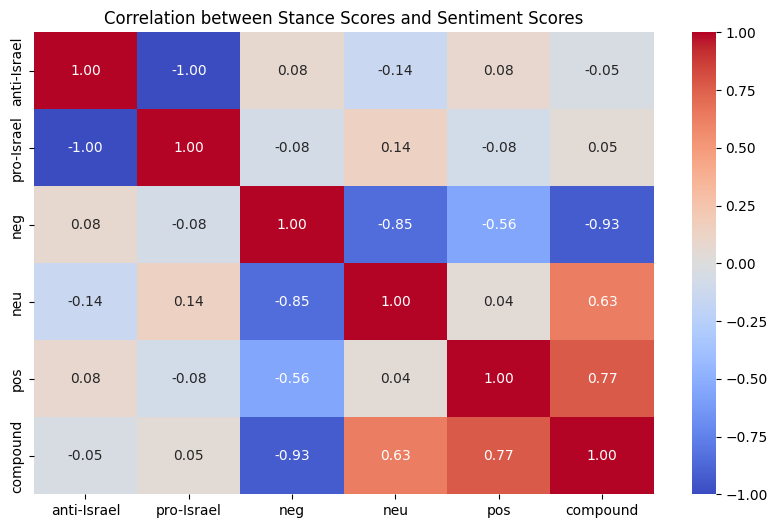

In [13]:
# Merge the datasets on the basis of titles/sequences
# Ensuring that the titles match in both datasets for accurate merging
merged_df = pd.merge(stance_df, sentiment_df, left_on='sequence', right_on='Title')

# Dropping redundant columns after merge
merged_df.drop(['Title'], axis=1, inplace=True)

# Checking the first few rows of the merged dataset
merged_df_head = merged_df.head()

# Display the structure of the merged dataset
merged_df_head

import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix for stance and sentiment scores
correlation_matrix = merged_df[['anti-Israel', 'pro-Israel', 'neg', 'neu', 'pos', 'compound']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Stance Scores and Sentiment Scores")
plt.show()


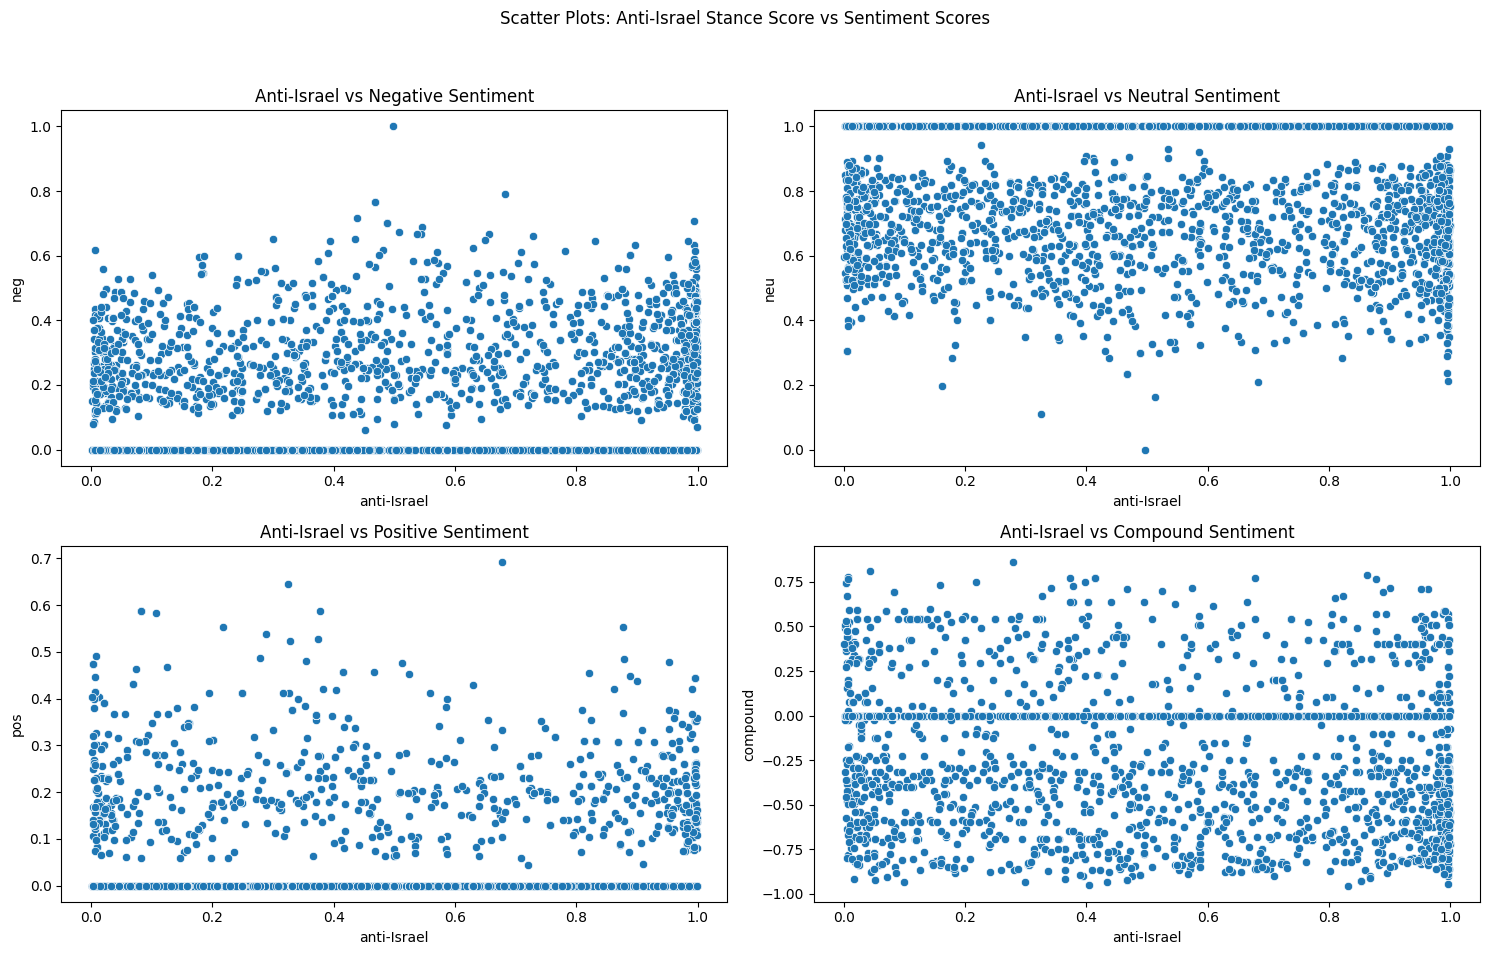

In [14]:
# Creating scatter plots for 'anti-Israel' stance score vs each sentiment score

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: Anti-Israel Stance Score vs Sentiment Scores')

# Anti-Israel vs Negative Sentiment
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='anti-Israel', y='neg')
axes[0, 0].set_title('Anti-Israel vs Negative Sentiment')

# Anti-Israel vs Neutral Sentiment
sns.scatterplot(ax=axes[0, 1], data=merged_df, x='anti-Israel', y='neu')
axes[0, 1].set_title('Anti-Israel vs Neutral Sentiment')

# Anti-Israel vs Positive Sentiment
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='anti-Israel', y='pos')
axes[1, 0].set_title('Anti-Israel vs Positive Sentiment')

# Anti-Israel vs Compound Sentiment
sns.scatterplot(ax=axes[1, 1], data=merged_df, x='anti-Israel', y='compound')
axes[1, 1].set_title('Anti-Israel vs Compound Sentiment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

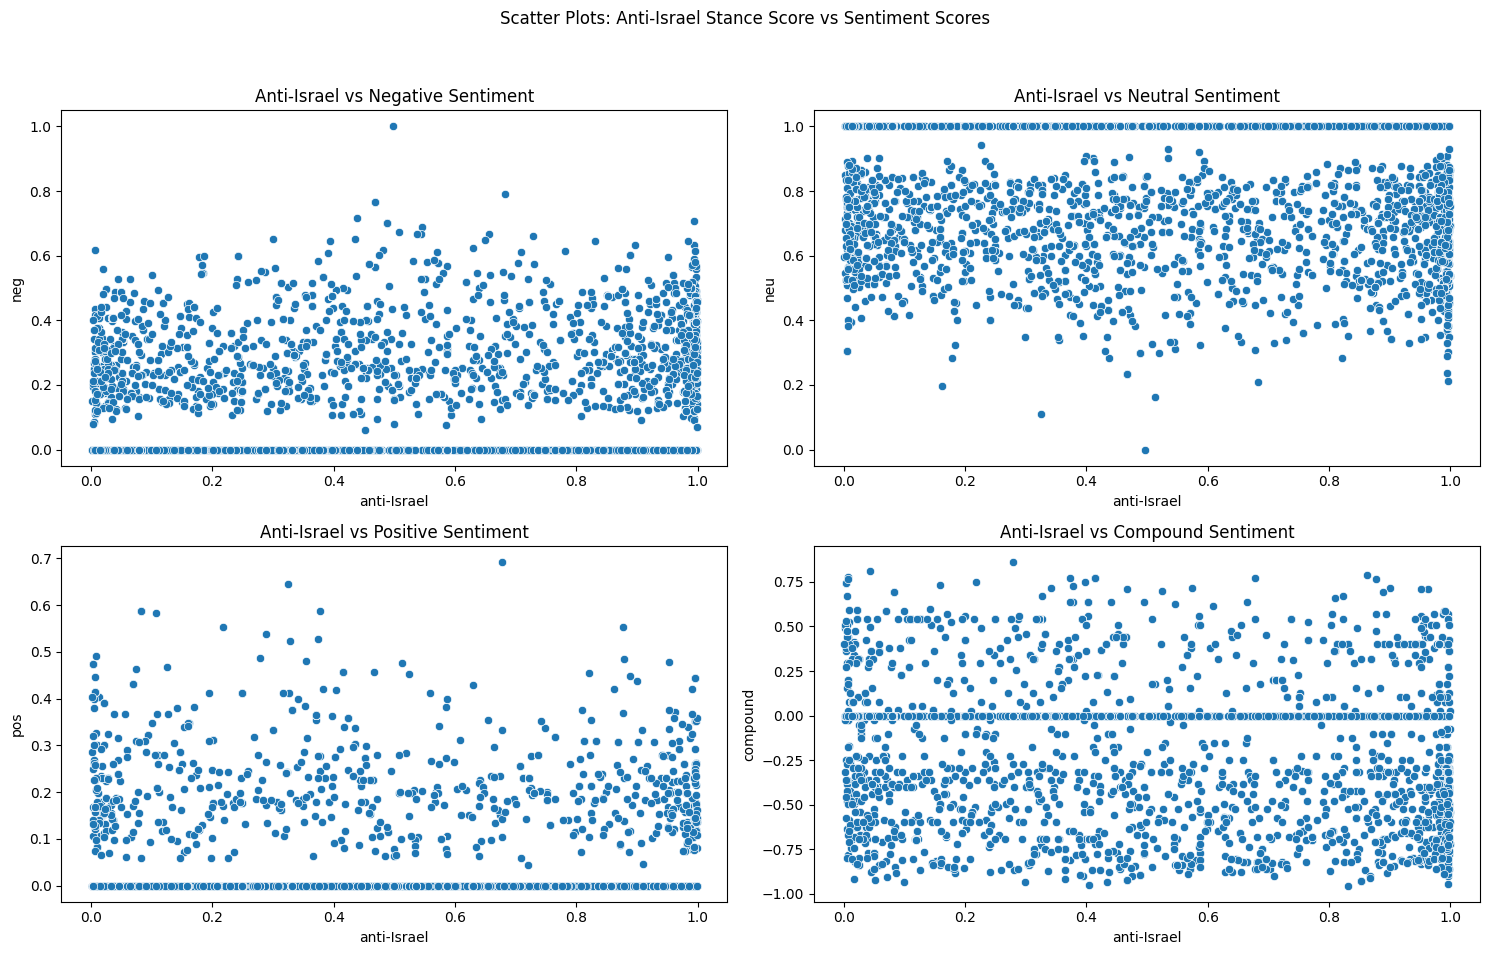

In [15]:
# Creating scatter plots for 'anti-Israel' stance score vs each sentiment score

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: Anti-Israel Stance Score vs Sentiment Scores')

# Anti-Israel vs Negative Sentiment
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='anti-Israel', y='neg')
axes[0, 0].set_title('Anti-Israel vs Negative Sentiment')

# Anti-Israel vs Neutral Sentiment
sns.scatterplot(ax=axes[0, 1], data=merged_df, x='anti-Israel', y='neu')
axes[0, 1].set_title('Anti-Israel vs Neutral Sentiment')

# Anti-Israel vs Positive Sentiment
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='anti-Israel', y='pos')
axes[1, 0].set_title('Anti-Israel vs Positive Sentiment')

# Anti-Israel vs Compound Sentiment
sns.scatterplot(ax=axes[1, 1], data=merged_df, x='anti-Israel', y='compound')
axes[1, 1].set_title('Anti-Israel vs Compound Sentiment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
# Regression Analysis

#Regression analysis will help us understand the predictive relationship between stance scores and sentiment scores. We'll perform linear regression for this purpose. Given the nature of your data, we'll focus on the following relationships:

#'anti-Israel' stance score as a predictor for each sentiment score.
#'pro-Israel' stance score as a predictor for each sentiment score.

# Reload the files
stance_classification_path_new = 'stance_classification.csv'
sentiment_path_new = 'sentiment.csv'

# Read the new CSV files into DataFrames
stance_df_new = pd.read_csv(stance_classification_path_new)
sentiment_df_new = pd.read_csv(sentiment_path_new)

# Preparing the data similarly to before
# Convert string representations to lists and dictionaries
stance_df_new['labels'] = stance_df_new['labels'].apply(parse_string_to_literal)
stance_df_new['scores'] = stance_df_new['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df_new.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df_new.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df_new['Sentiment Scores'] = sentiment_df_new['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded_new = sentiment_df_new['Sentiment Scores'].apply(pd.Series)
sentiment_df_new = pd.concat([sentiment_df_new, sentiment_scores_expanded_new], axis=1).drop('Sentiment Scores', axis=1)

# Merging the dataframes on the sequence/title
merged_df_new = pd.merge(stance_df_new, sentiment_df_new, left_on='sequence', right_on='Title')
merged_df_new.drop(['Title'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df_new_head = merged_df_new.head()
merged_df_new_head


from sklearn.linear_model import LinearRegression

# Function to perform linear regression
def perform_linear_regression(df, x_col, y_cols):
    results = {}
    for y_col in y_cols:
        # Preparing the data
        X = df[[x_col]]
        y = df[y_col]

        # Performing linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Storing the results
        results[y_col] = {
            'Coefficient': model.coef_[0],
            'Intercept': model.intercept_,
            'R-Squared': model.score(X, y)
        }
    return results

# Performing regression analysis for 'anti-Israel' score
anti_israel_regression_results = perform_linear_regression(merged_df_new, 'anti-Israel', ['neg', 'neu', 'pos', 'compound'])
anti_israel_regression_results

{'neg': {'Coefficient': 0.041790702775279166,
  'Intercept': 0.2755567083744303,
  'R-Squared': 0.005632943626296294},
 'neu': {'Coefficient': -0.0651801921785269,
  'Intercept': 0.6927480425688701,
  'R-Squared': 0.01993475079484297},
 'pos': {'Coefficient': 0.023350861425302596,
  'Intercept': 0.03169102846985354,
  'R-Squared': 0.006332471633797354},
 'compound': {'Coefficient': -0.05912698433618028,
  'Intercept': -0.4230467569034611,
  'R-Squared': 0.0021102016183682792}}

/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/v

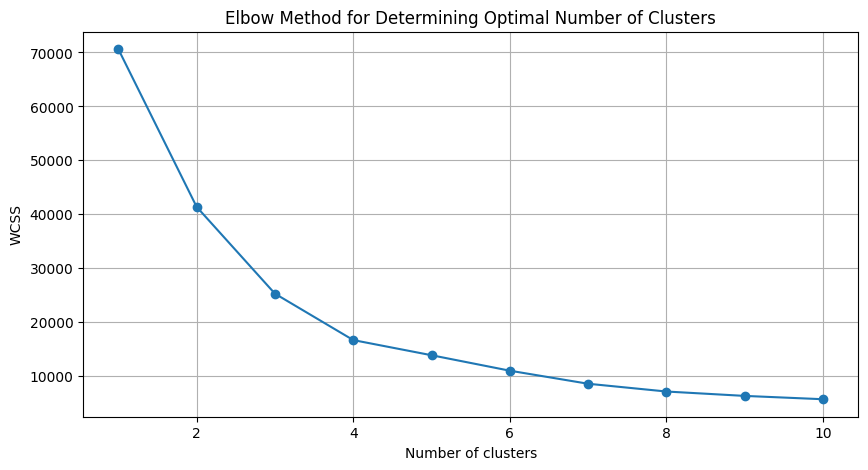

In [20]:
# Cluster Analysis

# Re-importing necessary libraries and redefining required functions after code execution state reset
import pandas as pd
import ast
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Re-defining the function to convert string representations to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return json.loads(string)

# Reload the files
stance_classification_path_new = 'stance_classification.csv'
sentiment_path_new = 'sentiment.csv'

# Read the new CSV files into DataFrames
stance_df_new = pd.read_csv(stance_classification_path_new)
sentiment_df_new = pd.read_csv(sentiment_path_new)

# Preparing the data similarly to before
# Convert string representations to lists and dictionaries
stance_df_new['labels'] = stance_df_new['labels'].apply(parse_string_to_literal)
stance_df_new['scores'] = stance_df_new['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df_new.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df_new.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df_new['Sentiment Scores'] = sentiment_df_new['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded_new = sentiment_df_new['Sentiment Scores'].apply(pd.Series)
sentiment_df_new = pd.concat([sentiment_df_new, sentiment_scores_expanded_new], axis=1).drop('Sentiment Scores', axis=1)

# Merging the dataframes on the sequence/title
merged_df_new = pd.merge(stance_df_new, sentiment_df_new, left_on='sequence', right_on='Title')
merged_df_new.drop(['Title'], axis=1, inplace=True)

# Preparing the data for clustering
features_for_clustering = ['anti-Israel', 'pro-Israel', 'neg', 'neu', 'pos', 'compound']
X_clustering = merged_df_new[features_for_clustering]

# Standardizing the features
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [21]:
# Performing K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_clustering)

# Adding the cluster labels to the original dataframe
merged_df_new['Cluster'] = cluster_labels

# Displaying the first few rows of the dataframe with cluster labels
merged_df_new_head_with_clusters = merged_df_new.head()
merged_df_new_head_with_clusters

/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,labels,sequence,scores,anti-Israel,pro-Israel,neg,neu,pos,compound,Cluster
0,"[anti-Israel, pro-Israel]",Hamas event in Jerusalem : Wage jihad to destr...,"[0.9986788630485535, 0.0013211950426921248]",0.998679,0.001321,0.304,0.696,0.0,-0.5423,2
1,"[anti-Israel, pro-Israel]","In Hamas - governed Gaza , Fatah rallies again...","[0.9928072690963745, 0.007192753255367279]",0.992807,0.007193,0.308,0.692,0.0,-0.6124,2
2,"[anti-Israel, pro-Israel]",Universities Are Seeing An Enormous Spike In A...,"[0.7671117186546326, 0.23288823664188385]",0.767112,0.232888,0.000,1.000,0.0,0.0000,0
3,"[anti-Israel, pro-Israel]",Universities Are Seeing An Enormous Spike In A...,"[0.7671117186546326, 0.23288823664188385]",0.767112,0.232888,0.000,1.000,0.0,0.0000,0
4,"[anti-Israel, pro-Israel]",Universities Are Seeing An Enormous Spike In A...,"[0.7671117186546326, 0.23288823664188385]",0.767112,0.232888,0.000,1.000,0.0,0.0000,0


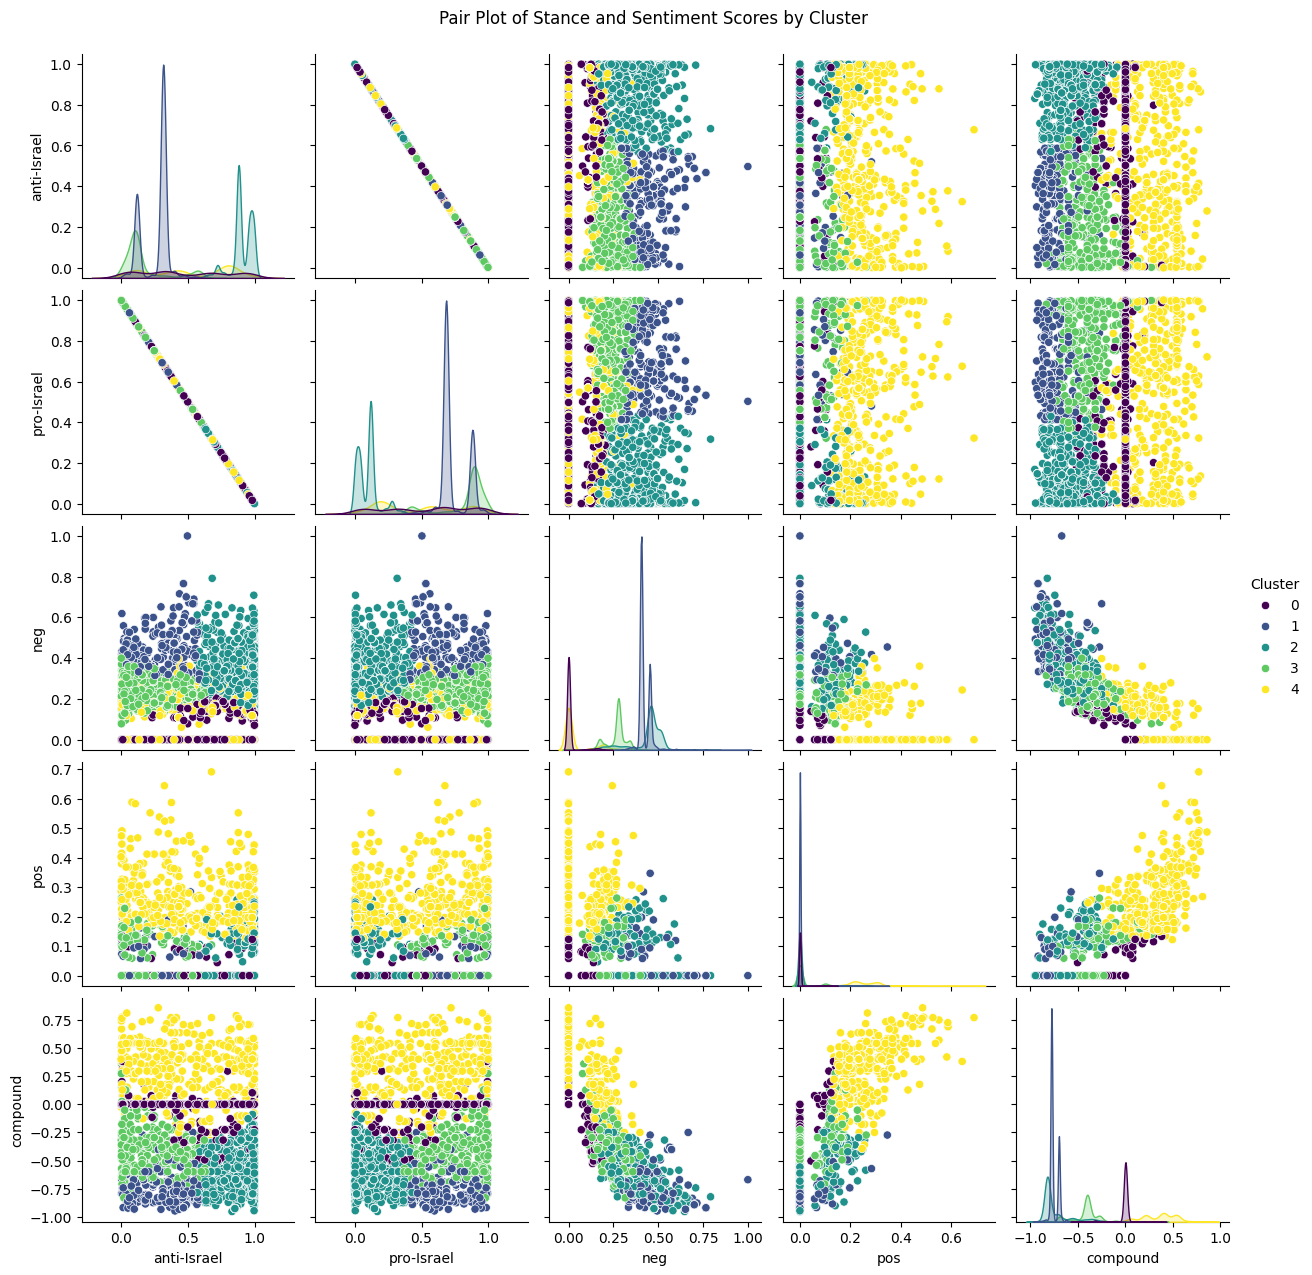

In [22]:
import seaborn as sns

# Selecting a subset of columns for visualization
columns_for_visualization = ['anti-Israel', 'pro-Israel', 'neg', 'pos', 'compound', 'Cluster']

# Creating a pair plot
sns.pairplot(merged_df_new[columns_for_visualization], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Stance and Sentiment Scores by Cluster', y=1.02)
plt.show()